# Machine Learning and Statistics
## GMIT H.Dip in Data Analytics 
### Diarmuid Whelan Oct 2019 
###  Boston House Prices

Download libraries and Boston house price dataset. Manipulate and process the dataset to begin exploratory data analysis

In [6]:
####Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline



In [7]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Load the sklearn dataset
from sklearn.datasets import load_boston
boston_house_prices = load_boston()
prices = boston_house_prices.target # Define the target values
features = boston_house_prices.data # Define the attribute values

#Store in DataFrame - Easier manipulation
attributes = boston_house_prices.feature_names # feature name(s)
data    = pd.DataFrame(features, columns = attributes)
target  = pd.DataFrame(prices, columns =['MEDV'])
boston  = pd.concat([data, target,], axis = 1) #concat data/target

The Boston House Price dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.


The features contained in the dataset are:


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 USD

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - percentage lower status of the population

MEDV - Median value of owner-occupied homes in 1000 USD


## Exploratory Data Analysis
Examine the characteristics of the dataset

Calculate summary statistics and correlations

There are 506 records of the above features and theyare all numerical data type


In [3]:
#print(boston_house_prices.keys())
print(boston.shape)
print(boston.dtypes)
print(boston.head)

#print(target.head)

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5

In [4]:
print(boston.describe())

print(boston.corr(method='pearson'))

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Visualisations
Examine correlations, distributions and visualise the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4276BD160>,
      dtype=object)

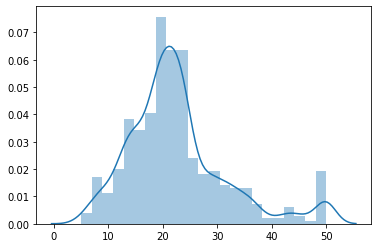

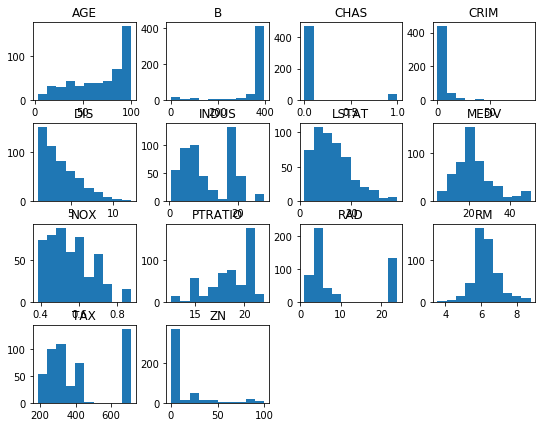

In [5]:
#Distribution of the target variable - looks normally distributed
sns.distplot(target)
#Print histogram of each feature
boston.hist(bins=10,figsize=(9,7),grid=False)

Prices look to be normally distributed. Run a Shapiro-Wilk test to confirm normality and construct Q-Q plots. Both confirm that normality.

Test Statistic=0.917, p=0.0000


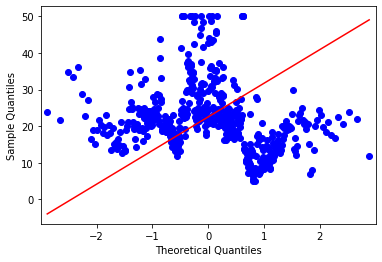

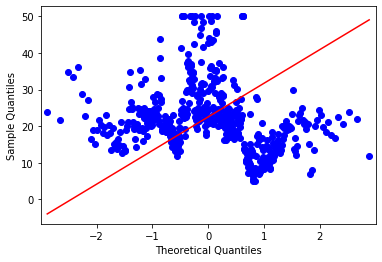

In [6]:
#Run Shapiro Wilks test and construct Q-Q plots to demonstrate normal dist
from scipy.stats import shapiro 
shapiro_test = shapiro(target) #

stat, p = shapiro_test
print('Test Statistic=%.3f, p=%.4f' % (stat, p))
sm.qqplot(target, line='s')

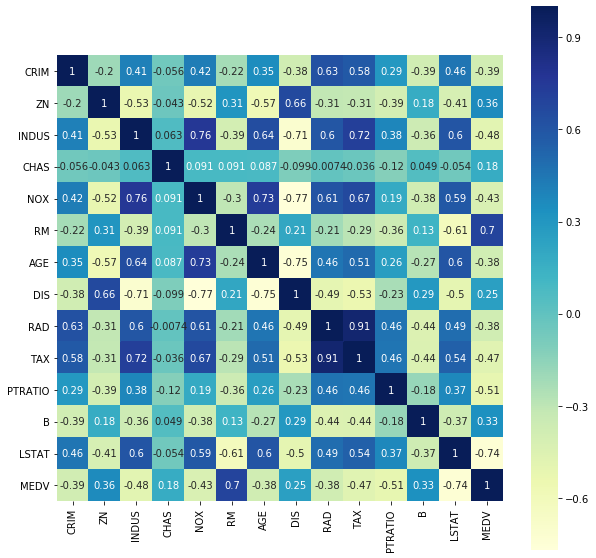

In [7]:


plt.figure(figsize=(10, 10))
#display a correlation matrix
correlations = boston.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

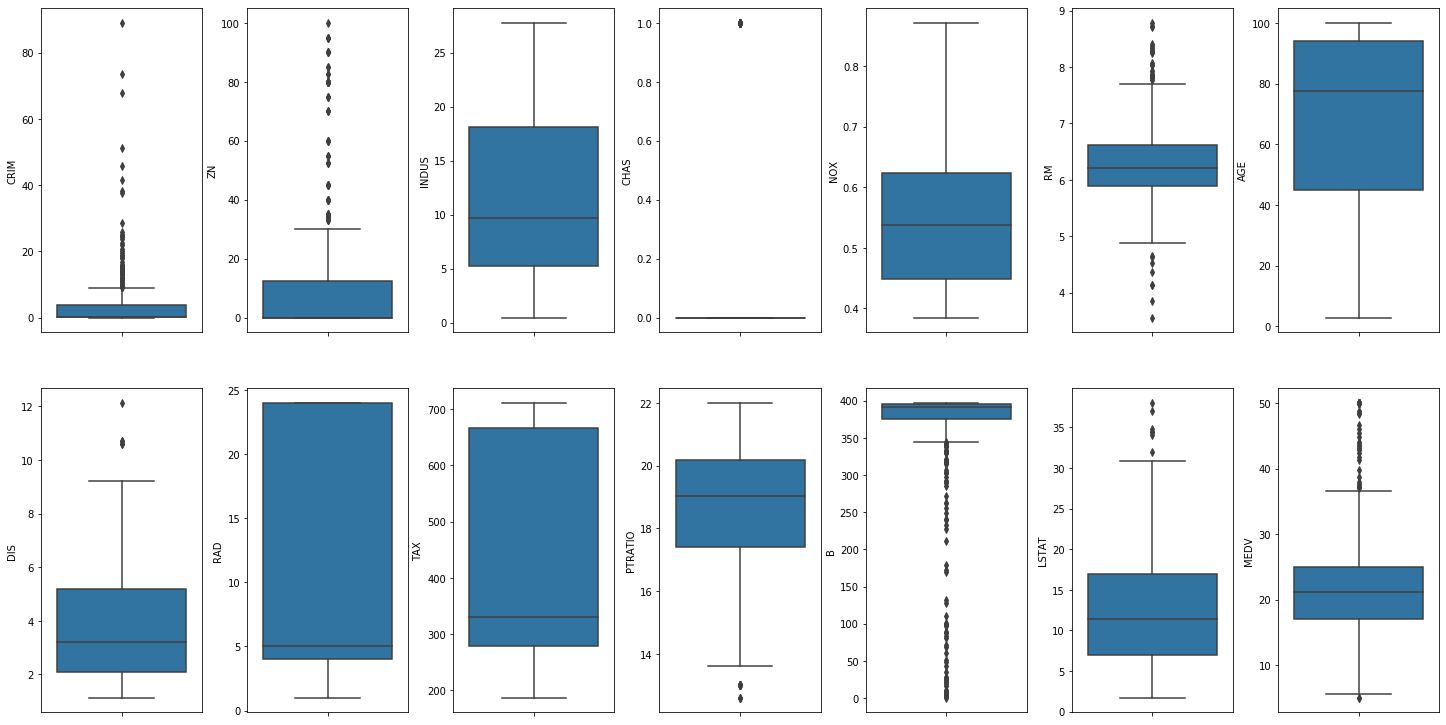

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston.items():
    sns.boxplot(y=k, data=boston, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

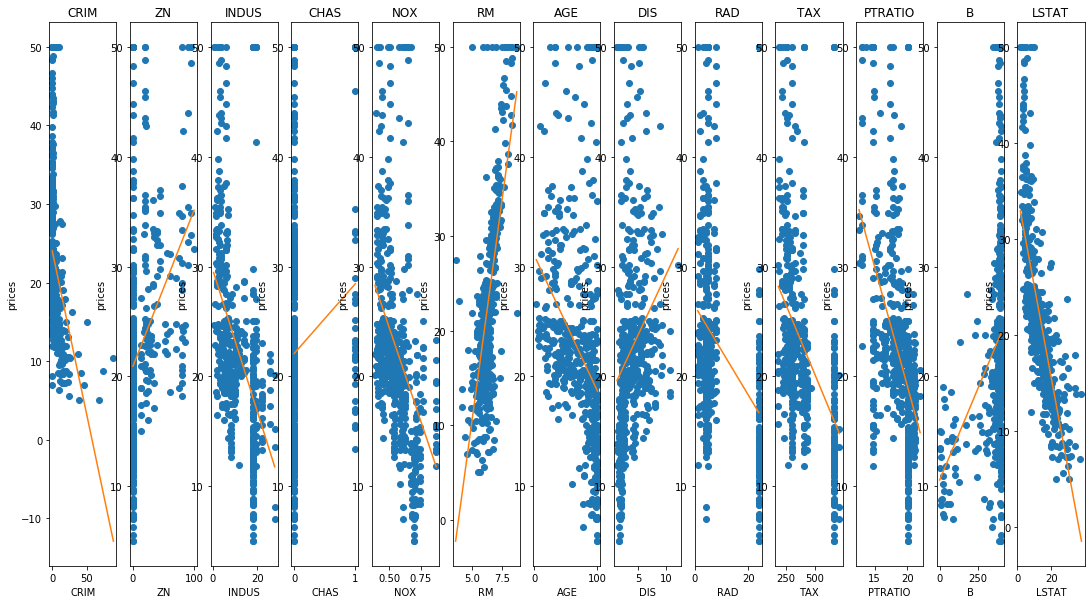

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))


for i, col in enumerate(data.columns):
    
    plt.subplot(1, 14, i+1)
    x = data[col]
    y = prices
    plt.plot(x, y, 'o')
    # Add regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

### Inferential Statistics on Charles River

In [10]:

# Find houses along the Charles river
charles=boston[boston['CHAS']==1]
non_charles=boston[boston['CHAS']==0]
print(charles.describe())
print(non_charles.describe())

            CRIM         ZN      INDUS  CHAS        NOX         RM        AGE  \
count  35.000000  35.000000  35.000000  35.0  35.000000  35.000000   35.00000   
mean    1.851670   7.714286  12.719143   1.0   0.593426   6.519600   77.50000   
std     2.494072  18.800143   5.957623   0.0   0.144736   0.876416   22.02134   
min     0.015010   0.000000   1.210000   1.0   0.401000   5.012000   24.80000   
25%     0.125060   0.000000   6.410000   1.0   0.489000   5.935500   60.30000   
50%     0.447910   0.000000  13.890000   1.0   0.550000   6.250000   88.50000   
75%     3.397665   0.000000  18.100000   1.0   0.693000   6.915000   93.20000   
max     8.982960  90.000000  19.580000   1.0   0.871000   8.780000  100.00000   

             DIS        RAD         TAX    PTRATIO           B      LSTAT  \
count  35.000000  35.000000   35.000000  35.000000   35.000000  35.000000   
mean    3.029709   9.314286  386.257143  17.491429  372.997429  11.241714   
std     1.254728   8.248962  165.012004

On initial inspection of the summary statistics, there are 471 instances in the non Charles River area and 35 instances in the Charles River area. There is a decent difference in the means(22k vs 28k). We will examine the samples further below and perform a t test on these to confirm initial observations

C:\Users\Diarmuid\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Diarmuid\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


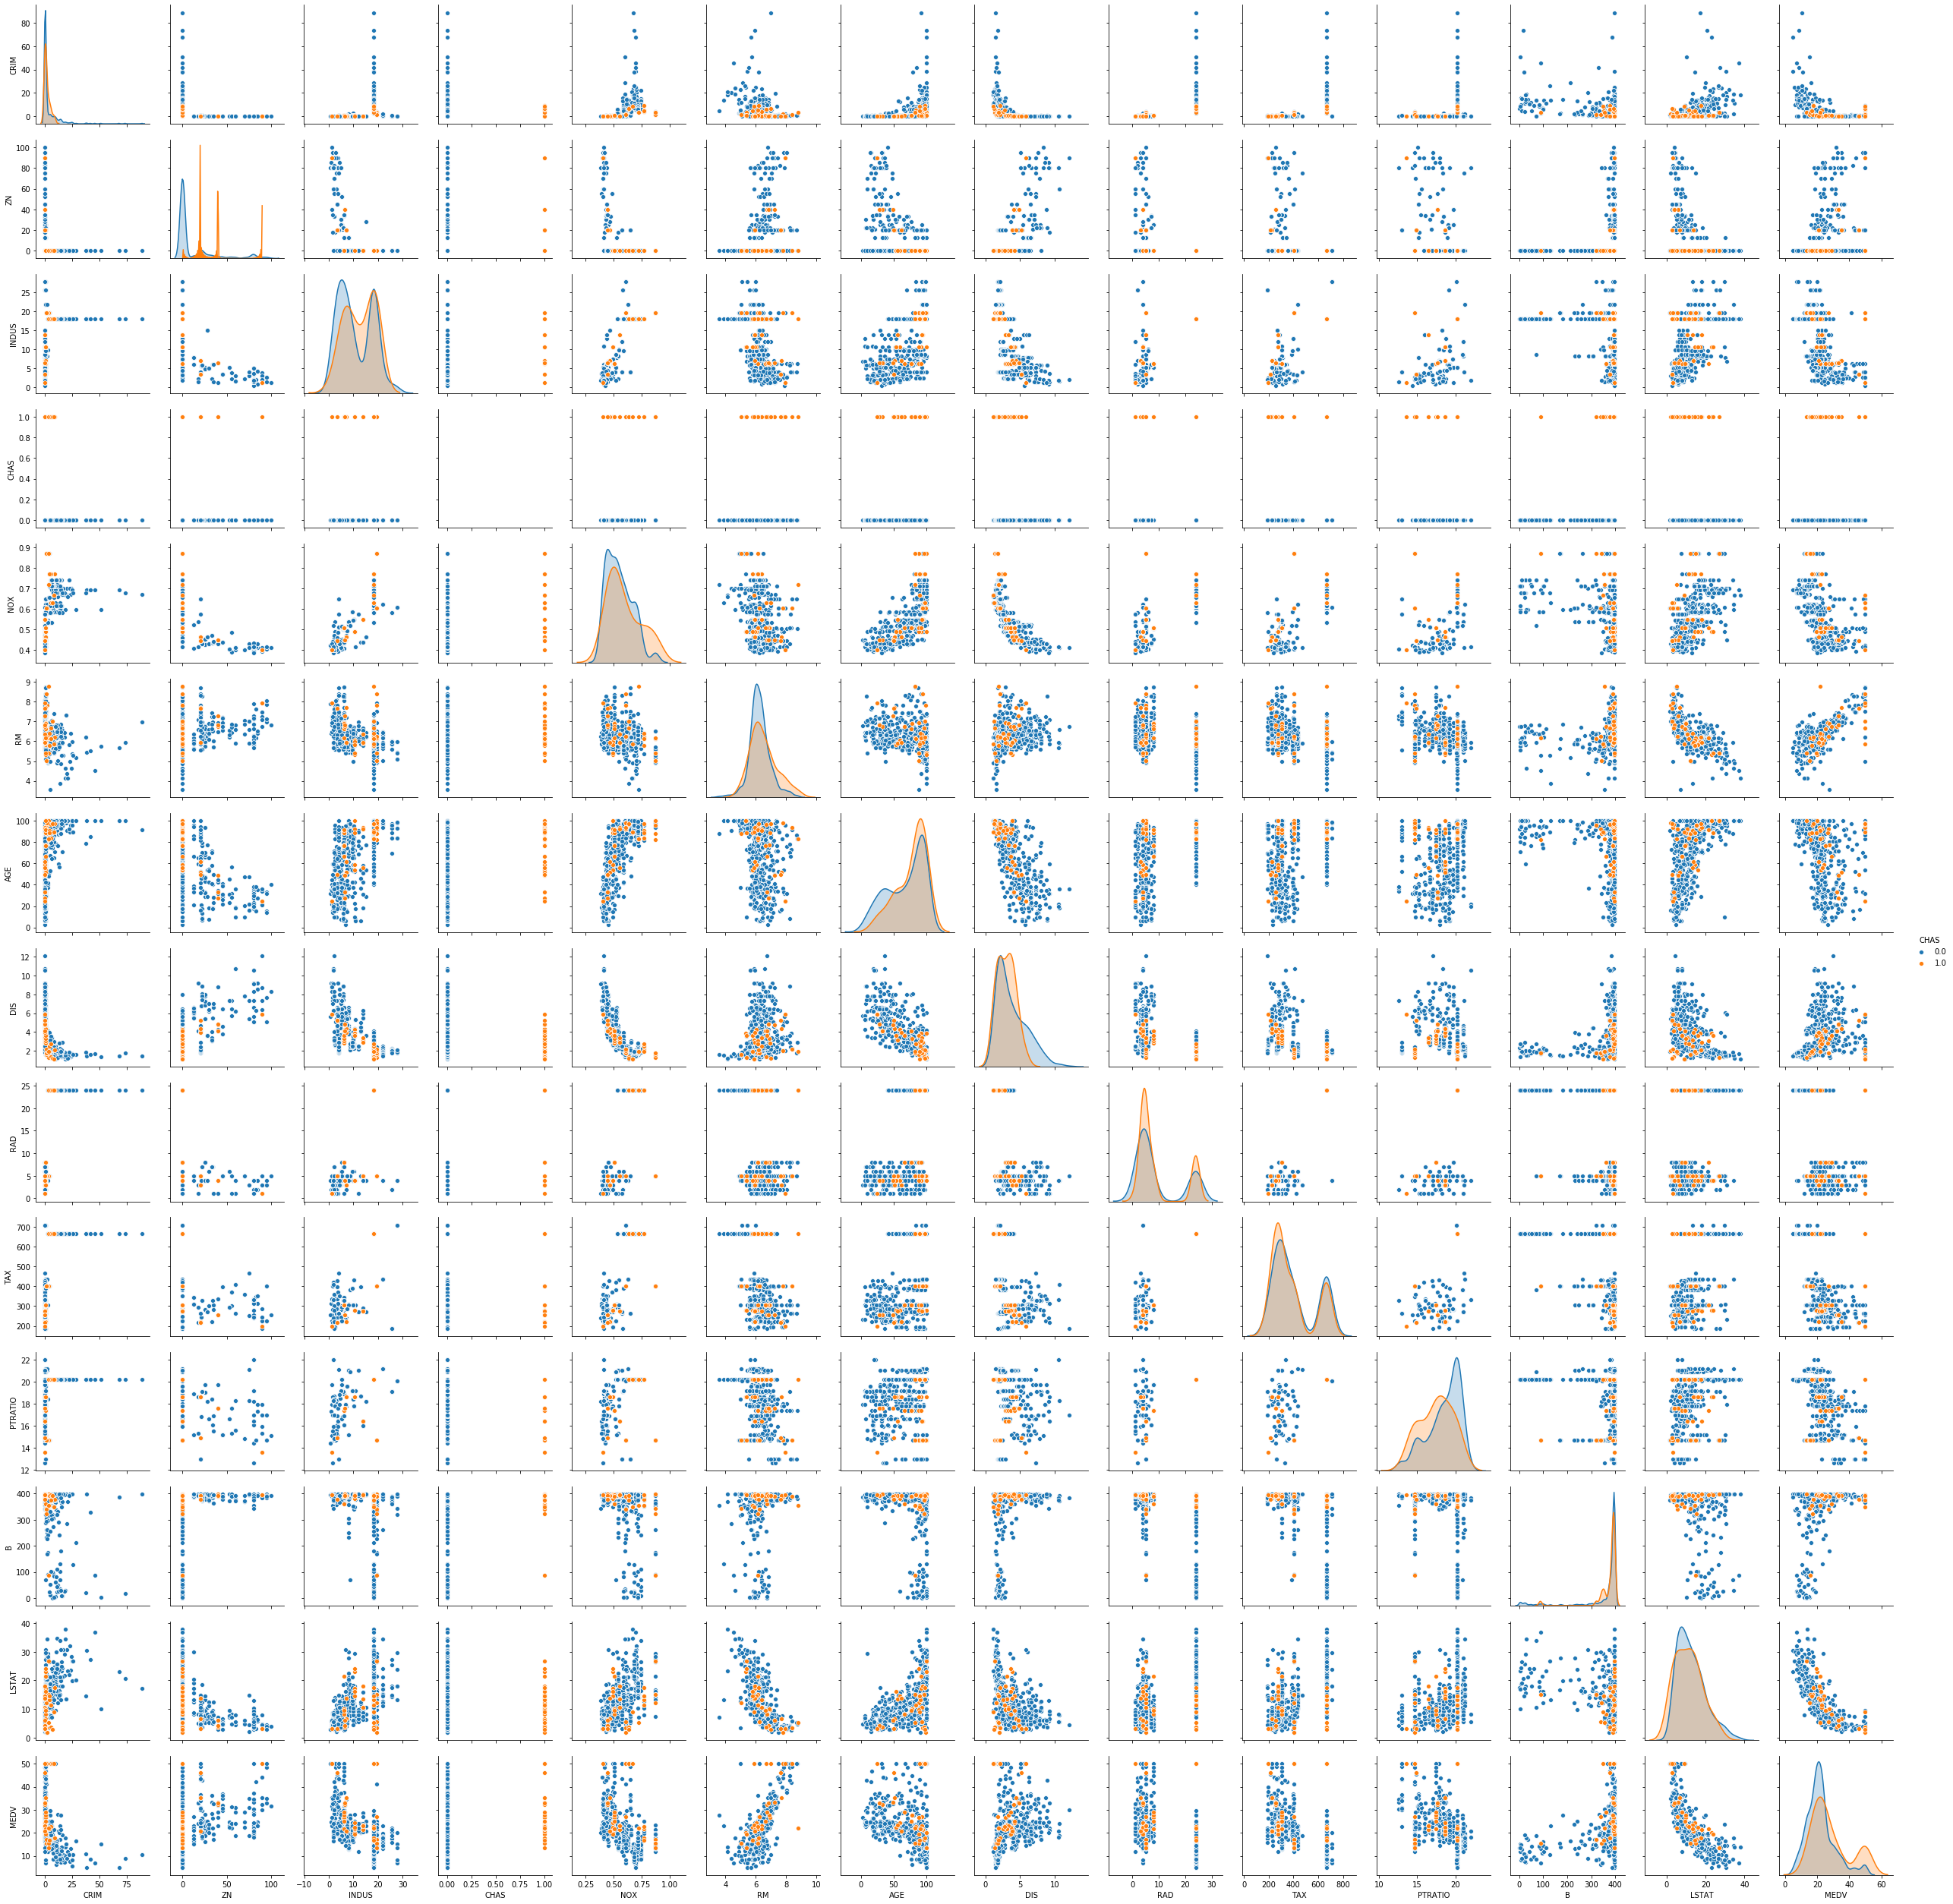

In [11]:
sns.pairplot(boston, hue = "CHAS")

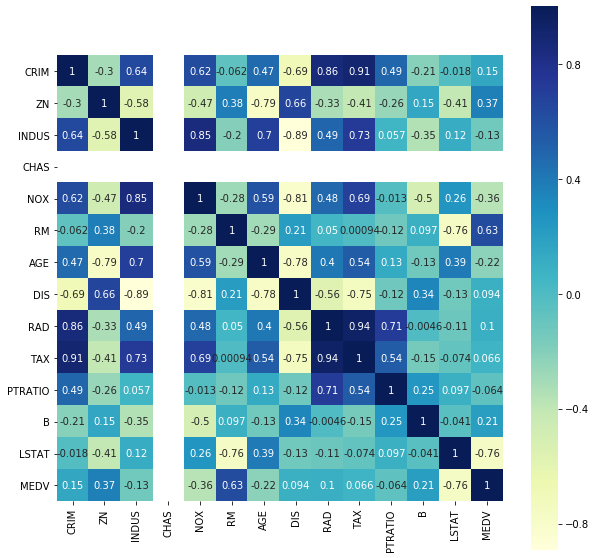

In [12]:
plt.figure(figsize=(10, 10))
#display a correlation matrix
correlations = charles.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

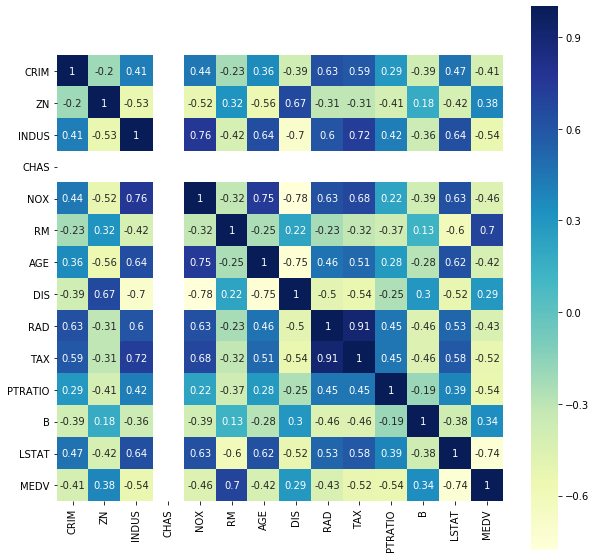

In [13]:
plt.figure(figsize=(10, 10))
#display a correlation matrix
correlations = non_charles.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

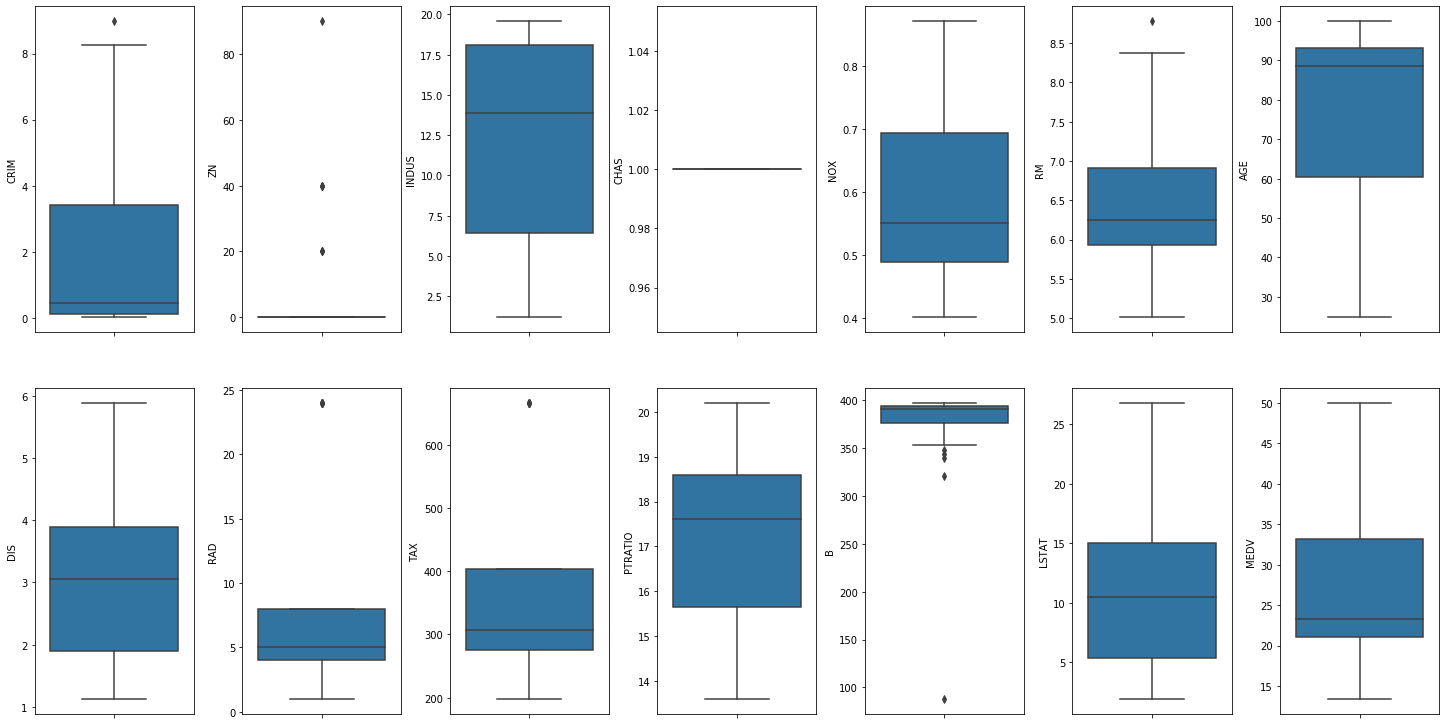

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in charles.items():
    sns.boxplot(y=k, data=charles, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

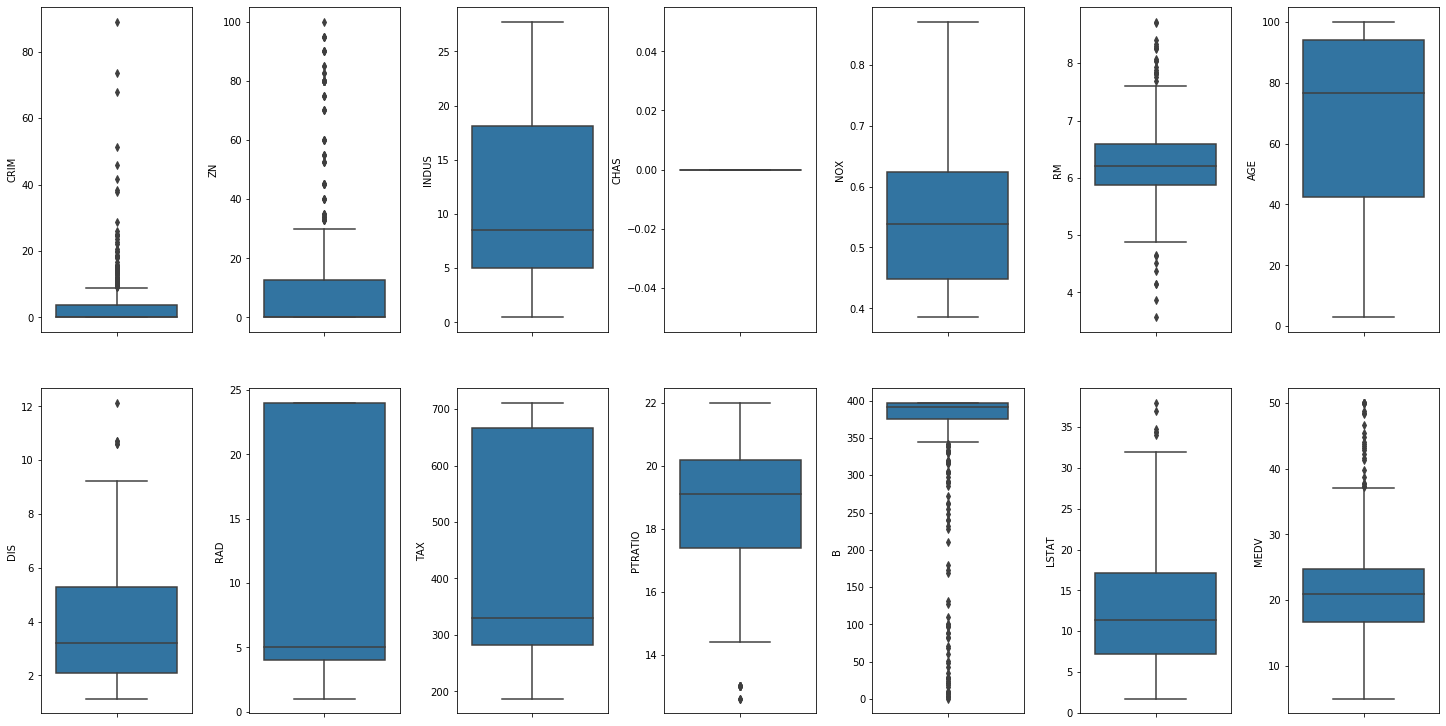

In [15]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in non_charles.items():
    sns.boxplot(y=k, data=non_charles, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

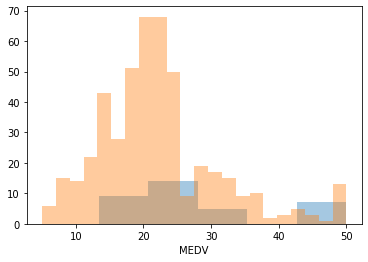

In [16]:
#Compare Median Value of Charles river area vs non Charles River area
sns.distplot(charles["MEDV"],  kde=False)
sns.distplot(non_charles["MEDV"],  kde=False)

Looking at the distiribution and characteristics of the 2 samples (non charles river area and charles river area), Perform a independent means t test to see if we can reject/accept the null hypothesis of no difference in mean value. A p value less than 1%, 5% or 10% implies statistical significance and enables us to reject the null hypothesis.
The result of the ttest comparing the mean value in Charles river are and non Charles river area tells us that we can reject the null and that the difference in means is significant. This is reinforced when observing the various distribution plots above.

In [17]:
ss.ttest_ind(charles["MEDV"], non_charles["MEDV"])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

## Prediction
Use Keras and Neural Networks to attempt to predict median house prices based on the features and attributes.

In [8]:

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
#import xgboost as xgb
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split #used to split the data into training and test sets
X=data
Y=target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)# takes 30% of the dataset to test models on


#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [58]:
br = BayesianRidge(compute_score=True)
ols = LinearRegression()
rf = RandomForestRegressor()
ll =LassoLarsIC()
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

br =BayesianRidge()
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)



model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
#model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
 #                            learning_rate=0.05, max_depth=3, 
  #                           min_child_weight=1.7817, n_estimators=2200,
   #                          reg_alpha=0.4640, reg_lambda=0.8571,
    #                         subsample=0.5213, silent=1,
     #                        random_state =7, nthread = -1)


In [59]:
score = rmsle_cv(ols)
print("\nLinear Regression: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(br)
print("\nBayesian Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(rf)
print("\nRandom Forest Regresser score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ll)
print("\nLasso Lars score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#score = rmsle_cv(model_xgb)
#print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))




Linear Regression: 4.7564 (0.6147)


Bayesian Ridge score: 4.8441 (0.5773)


Random Forest Regresser score: 3.6448 (0.8693)


Lasso Lars score: 4.8716 (0.7509)


C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_



Lasso score: 4.7554 (0.6155)

ElasticNet score: 4.7551 (0.6158)

Kernel Ridge score: 4.1795 (0.9781)



C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was e

Gradient Boosting score: 3.0480 (0.4378)



C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

LGBM score: 3.1963 (0.5957)



In [11]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   
    
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Diarmuid\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was e

 Averaged base models score: 3.5426 (0.5202)



In [26]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

class Stacking_Averaged_Models(BaseEstimator, RegressorMixin, TransformerMixin):

    def __init__(self, base_models, meta_model, n_folds=5):

        self.base_models = base_models

        self.meta_model = meta_model

        self.n_folds = n_folds

   

    # we again fit the data on clones of the original models

    def fit(self, X, y):

        self.base_models_ = [list() for x in self.base_models]

        self.meta_model_ = clone(self.meta_model)

        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=15)

        

        # train cloned base models then create out-of-fold predictions that are needed to train the cloned meta-model

        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))

        for i, model in enumerate(self.base_models):

            for train_index, holdout_index in kfold.split(X, y):

                instance = clone(model)

                self.base_models_[i].append(instance)

                instance.fit(X[train_index], y[train_index])

                y_pred = instance.predict(X[holdout_index])

                out_of_fold_predictions[holdout_index, i] = y_pred

                

        # now train the cloned  meta-model using the out-of-fold predictions as new feature

        self.meta_model_.fit(out_of_fold_predictions, y)

        return self
    
stacked_averaged_models = Stacking_Averaged_Models(base_models = (ENet, GBoost, KRR), meta_model = lasso)



score = rmsle_cv(stacked_averaged_models)
print( "Stacked averaged-models score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))    

        
# StackedRegressor
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))

print( 'stacked regressor:', rmsle(y_train, stacked_train_pred))score = rmsle_cv(stacked_averaged_models)
print( "Stacked averaged-models score(cv): {:.4f} ({:.4f})".format(score.mean(), score.std()))    
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

#model_xgb.fit(train, y_train)
#xgb_train_pred = model_xgb.predict(train)
#xgb_pred = np.expm1(model_xgb.predict(test))
#print(rmsle(y_train, xgb_train_pred))

model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               #xgb_train_pred*0.15 + 
            lgb_train_pred*0.15 ))


ensemble = stacked_pred*0.70 +  lgb_pred*0.30
#+xgb_pred*0.15 

SyntaxError: invalid syntax (<ipython-input-26-03763c7f92fe>, line 67)

In [33]:

# For building neural networks.
import tensorflow.keras as kr

# For interacting with data sets.
import pandas as pd

# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod
import tensorflow


In [49]:
#https://www.kaggle.com/ironfrown/deep-learning-house-price-prediction-keras
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(t_model)

def basic_model_3(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(120, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(20, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
    t_model.add(Dropout(0.0))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer='nadam',
        metrics=[metrics.mae])
    return(t_model)

In [50]:

model = basic_model_3(X_train.shape[1], y_train.shape[1])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                1120      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               9720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                2420      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [52]:

epochs = 500
batch_size = 128

print('Epochs: ', epochs)
print('Batch size: ', batch_size)

keras_callbacks = [
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2)
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0)
    # TensorBoard(log_dir='/tmp/keras_logs/model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
    EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

history = model.fit(X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=0, # Change it to 2, if wished to observe execution
    validation_data=(X_test, y_test),
    callbacks=keras_callbacks)

train_score = model.evaluate(X_train, y_train, verbose=0)
valid_score = model.evaluate(X_test, y_test, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Epochs:  500
Batch size:  128
Train MAE:  2.9346 , Train Loss:  23.28
Val MAE:  3.5132 , Val Loss:  37.3457


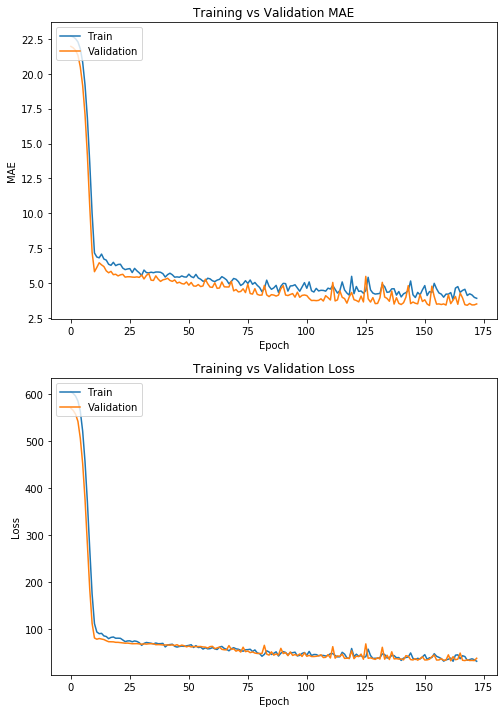

In [53]:

def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, y0size]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return


plot_hist(history.history, xsize=8, ysize=12)

Epochs:  500
Batch size:  128
Train MAE:  1.9291 , Train Loss:  11.5466
Val MAE:  2.5718 , Val Loss:  19.5406


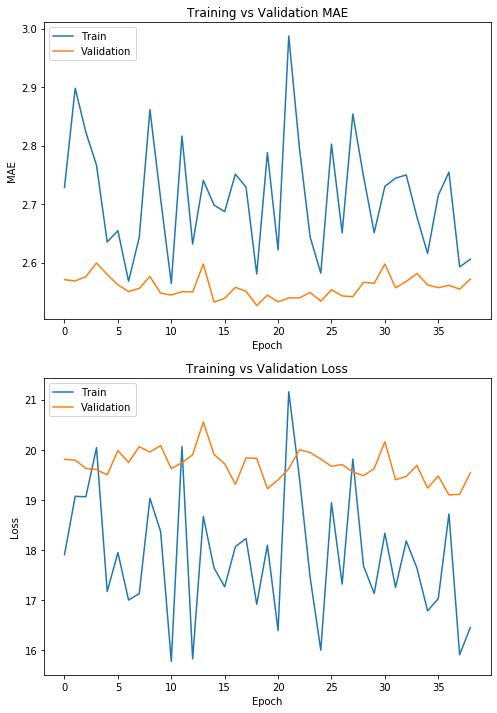

In [65]:
from sklearn import preprocessing
# Get column names first
names = data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
epochs = 500
batch_size = 128
X=scaled_df
Y=target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)# takes 30% of the dataset to test models on

y=scaled_df
print('Epochs: ', epochs)
print('Batch size: ', batch_size)

keras_callbacks = [
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2)
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0)
    # TensorBoard(log_dir='/tmp/keras_logs/model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
    EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

history = model.fit(X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=0, # Change it to 2, if wished to observe execution
    validation_data=(X_test, y_test),
    callbacks=keras_callbacks)

train_score = model.evaluate(X_train, y_train, verbose=0)
valid_score = model.evaluate(X_test, y_test, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))


plot_hist(history.history, xsize=8, ysize=12)

In [ ]:
# Create range for your new columns
lat_range = zip(xrange(32, 44), xrange(33, 45))
new_df = pd.DataFrame()
# Iterate and create new columns, with the 0 and 1 encoding
for r in lat_range
        new_df["latitude_%d_to_%d" % r] = df["latitude"].apply(
            lambda l: 1.0 if l >= r[0] and l < r[1] else 0.0)
new_df



from sklearn import preprocessing
# Get column names first
names = data.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
epochs = 500
batch_size = 128
X=scaled_df
Y=target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)# takes 30% of the dataset to test models on

y=scaled_df
print('Epochs: ', epochs)
print('Batch size: ', batch_size)

keras_callbacks = [
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2)
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0)
    # TensorBoard(log_dir='/tmp/keras_logs/model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
    EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

history = model.fit(X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=0, # Change it to 2, if wished to observe execution
    validation_data=(X_test, y_test),
    callbacks=keras_callbacks)

train_score = model.evaluate(X_train, y_train, verbose=0)
valid_score = model.evaluate(X_test, y_test, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))